<h1>3D plot Zemljine orbite</h1>

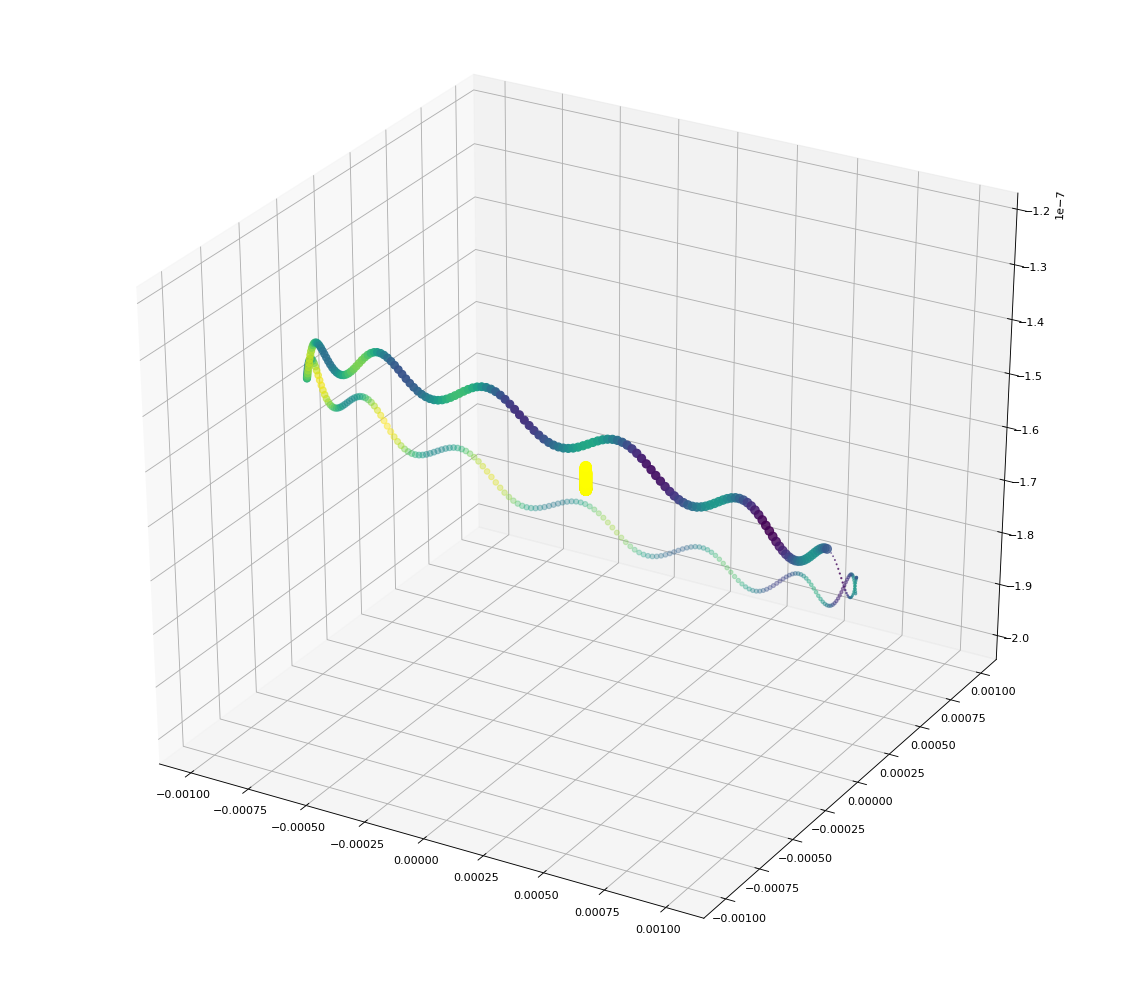

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.constants as ap
from mpl_toolkits.mplot3d import Axes3D

x, y, z, vx, vy, vz, lt, rg, rr  = np.loadtxt('podaci/zemlja_pravougle.dat', delimiter=',', skiprows=3, unpack=True)
xs, ys, zs, vxs, vys, vzs, lts, rgs, rrs  = np.loadtxt('podaci/sunce_pravougle.dat', delimiter=',', skiprows=3, unpack=True)


x = x/ap.au.value
y = y/ap.au.value
z = z/ap.au.value

xs = xs/ap.au.value
ys = ys/ap.au.value
zs = zs/ap.au.value

ap = np.arctan2(y, x)
ap[ap<0] += 2*np.pi

fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

c = vz[0:365]/max(vz[0:365])
s = ap[0:365]*10

ax.scatter(x[0:365], y[0:365], z[0:365], s=s, c=c )
ax.scatter(xs[0:365], ys[0:365], zs[0:365], s=100, c='yellow' )

# projekcija orbite na ravni
# ax.plot(x[0:365], y[0:365], np.full(365, -0.00005))
# ax.plot(x[0:365], np.full(365, 3), z[0:365])
# ax.plot(np.full(365, 3), y[0:365], z[0:365])

plt.show()


<h1>Andromedina galaksija</h1>

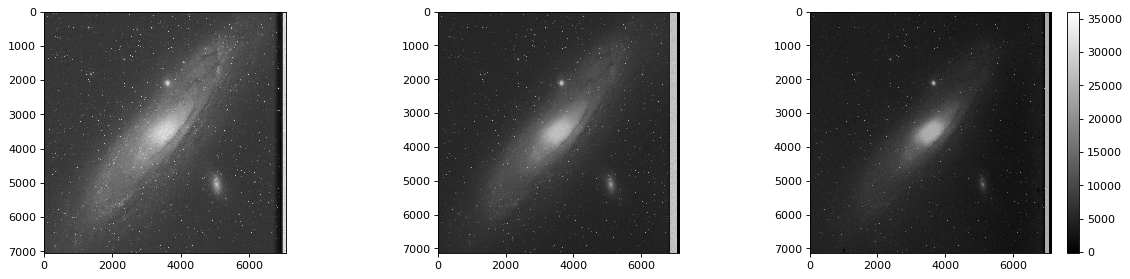

In [96]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

#B filter
hdul = fits.open('podaci/f001a066.fits')
#R filter
hdul1 = fits.open('podaci/f001a1hr.fits')
#I filter
hdul2 = fits.open('podaci/f001a25o.fits')



plt.figure(figsize=(18, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131)
plt.imshow(hdul[0].data, cmap='gray')
plt.subplot(132)
plt.imshow(hdul1[0].data, cmap='gray')
plt.subplot(133)
plt.imshow(hdul2[0].data, cmap='gray')
plt.colorbar()

plt.show()

#print(repr(hdul[0].header))



<h1>Zbir dve slike</h1>

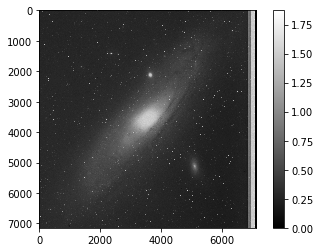

In [31]:
# from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np


hdul1 = fits.open('podaci/f001a1hr.fits')
hdul2 = fits.open('podaci/f001a25o.fits')


a = hdul1[0].data/np.max(hdul1[0].data) + hdul2[0].data/np.max(hdul2[0].data)

plt.figure()
plt.imshow(a, cmap='gray')
plt.colorbar()

plt.show()

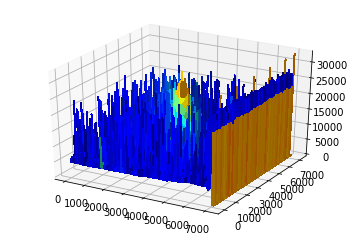

In [14]:
import numpy as np
import astropy.visualization as av
from astropy.io import fits
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


hdul = fits.open('podaci/f001a1hr.fits')
hdul1 = fits.open('podaci/f001a25o.fits')

x = range(7129)
y = range(7143)
X, Y = np.meshgrid(x, y)

color = hdul1['PRIMARY'].data/np.max(hdul1['PRIMARY'].data)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, hdul['PRIMARY'].data, facecolors=cm.jet(color), antialiased=False, alpha=1)
 
plt.show()


Filename: podaci/gll_iem_v02_P6_V11_DIFFUSE.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (720, 360, 30)   float32   
  1  ENERGIES      1 BinTableHDU     19   30R x 1C   [D]   


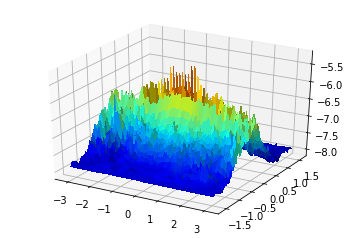

In [15]:
import astropy.io.fits as pyfits
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

podaci=fits.open('podaci/gll_iem_v02_P6_V11_DIFFUSE.fit')
podaci.info()

intenzitet = podaci['PRIMARY'].data

longituda = np.linspace(-np.pi, np.pi, 720)
latituda = np.linspace(-np.pi / 2, np.pi / 2, 360)
X, Y = np.meshgrid(longituda, latituda)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

boja=np.log10(intenzitet[20])
skala=np.max(boja)-np.min(boja)
boja=(boja-np.min(boja))/skala

ax.plot_surface(X, Y, np.log10(intenzitet[5]), facecolors=cm.jet(boja),
     linewidth=0, antialiased=False, alpha=1)
 
plt.show()

